<a href="https://colab.research.google.com/github/celestebgriff/Kmeans_Clustering_Algorithm/blob/master/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [109]:
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [110]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [111]:
df.isnull().values.any()

False

In [112]:
df = df[['Alcohol', 'Flavanoids']]
X = df.values

In [113]:
class CustomKMeans:
    def __init__(self, n_clusters=2, max_iter=350, tol=0.001):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    # Fit method
    def fit(self, X):
        n_samples = X.shape[0]

        # Check for sufficient iterations
        if self.max_iter <= 0:
            raise ValueError("Max iterations must be above 0")
        # Check for sufficient number of samples
        if n_samples < self.n_clusters:
            raise ValueError("Number of samples must be greater than or equal to number of clusters")
        
        # Initialize centroids
        self.centroids = {}
        
        seeds = np.random.permutation(n_samples)[:self.n_clusters]
      
        for i, seed in zip(range(self.n_clusters), seeds):
            self.centroids[i] = X[seed]

        # Start iterations
        for i in range(self.max_iter):
            self.clusters = {}
            for i in range(self.n_clusters):
                self.clusters[i] = []

            # Assign to cluster by calculated distance to clusters and selecting closest
            for sample in X:
                cluster = self.predict(sample)
                self.clusters[cluster].append(sample)

            prev_centroids = dict(self.centroids)

            # Update Centroids
            for cluster in self.clusters:
                self.centroids[cluster] = np.average(
                    self.clusters[cluster], axis=0)

            # If the clusters change outside the tolerance
            # If so, our clusters are suboptimal
            is_optimal = True

            for centroid in self.centroids:
                prev, curr = prev_centroids[centroid], self.centroids[centroid]

                if np.sum((curr - prev)/prev * 100.0) > self.tol:
                    is_optimal = False

            # break loop if optimal
            if is_optimal:
                break
    
    # Predict method
    def predict(self, data):
        dist = [np.linalg.norm(data - self.centroids[c])
                for c in self.centroids]
        cluster = dist.index(min(dist))
        return cluster

In [122]:
# Initializing SKlearn kmeans
km = KMeans(3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

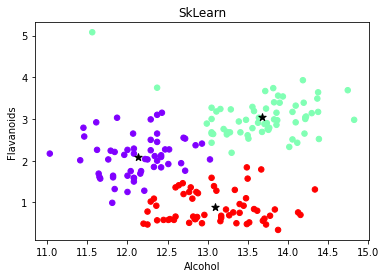

In [123]:
# Sklearn Kmeans cluster plot
plt.figure()

plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='rainbow', s=30)
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1], color='black', s=60, marker='*')
plt.title('SkLearn')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')

plt.show()

In [119]:
# Initializing KmeansCluster class
kmeans = CustomKMeans(3)
kmeans.fit(X)

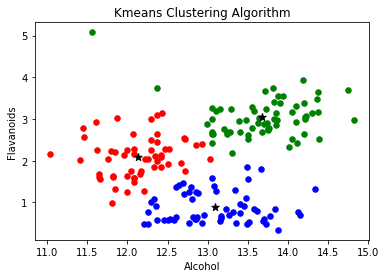

In [121]:
# Kmeans cluster class plot
colors = ['g', 'r', 'b']*10
plt.figure()                   

for i, cluster in kmeans.clusters.items():
    color = colors[i]
    for sample in cluster:
        plt.scatter(sample[0], sample[1], color=color, s=30)

for centroid in kmeans.centroids.values():
    plt.scatter(centroid[0], centroid[1], color='black', s=60, marker='*')

plt.title('Kmeans Clustering Algorithm')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')

plt.show()